Enzyme Kinetics Canvas Code:

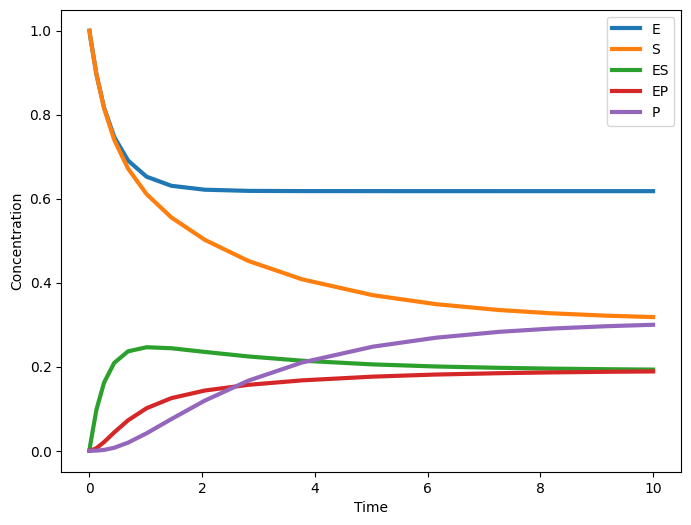

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# dydt is written as a function (like ode45 in MATLAB)
def enzyme_kinetics_ODE(t, y):
    E,S,ES,EP,P = y # unpack y
    # parameters
    k1  = 1 # 1/(mM s)
    kn1 = 1 # 1/s
    k2  = 1 # 1/s
    kn2 = 1 # 1/s
    k3  = 1 # 1/s
    kn3 = 1 # 1/(mM s)
    # differential equations
    dEdt  = - k1*E*S + kn1*ES                  + k3*EP - kn3*E*P
    dSdt  = - k1*E*S + kn1*ES 
    dESdt = + k1*E*S - kn1*ES - k2*ES + kn2*EP
    dEPdt =                   + k2*ES - kn2*EP - k3*EP + kn3*E*P
    dPdt  =                                    + k3*EP - kn3*E*P
    dydt = [dEdt,dSdt,dESdt,dEPdt,dPdt] # repack dydt
    return dydt
# the time interval of the simulation
tspan = [0,10]
# set initial conditions
y0 = [1,1,0,0,0] # E, S, ES, EP, P
# integrate the ODE
sol = solve_ivp(enzyme_kinetics_ODE, tspan, y0)
# plot the results
plt.figure(figsize=(8,6))
plt.plot(sol.t,sol.y.T,linewidth=3)
plt.legend(['E','S','ES','EP','P'])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()